In [3]:
# general python modules
import sys, os
import numpy as np
import matplotlib.pylab as plt
# then custom:
sys.path.append('../physion/src')
from physion.analysis.read_NWB import Data, scan_folder_for_NWBfiles
from physion.analysis.process_NWB import EpisodeData
from physion.utils import plot_tools as pt
from physion.dataviz.raw import plot as plot_raw, find_default_plot_settings

sys.path.append('../')
import plot_tools as pt

root_folder = os.path.join(os.path.expanduser('~'), 'CURATED', 'SST-ffGratingStim-2P')

## Build the dataset from the NWB files

In [4]:
DATASET = {\
    'WT':scan_folder_for_NWBfiles(os.path.join(root_folder, 'Wild-Type')),
    'KO':scan_folder_for_NWBfiles(os.path.join(root_folder, 'GluN1-KO')),
}

inspecting the folder "/Users/yann/CURATED/SST-ffGratingStim-2P/Wild-Type" [...]
 -> found n=18 datafiles (in 1.2s) 
inspecting the folder "/Users/yann/CURATED/SST-ffGratingStim-2P/GluN1-KO" [...]
 -> found n=14 datafiles (in 0.9s) 


NWB-file reading time: 67.0ms

calculating dF/F with method "sliding_percentile" [...]

  ** 1 ROIs were discarded with the positive F0 criterion (2.8%) ** 

-> dFoF calculus done !  (calculation took 0.0s)
NWB-file reading time: 73.3ms

calculating dF/F with method "sliding_percentile" [...]

  ** 24 ROIs were discarded with the positive F0 criterion (34.3%) ** 

-> dFoF calculus done !  (calculation took 0.1s)


(None, <Axes: >)

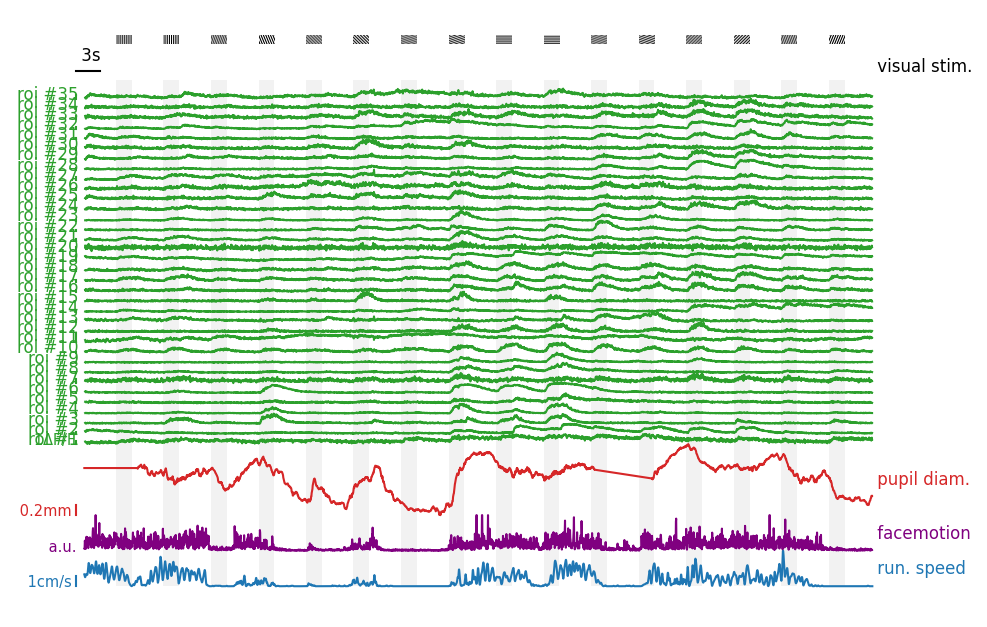

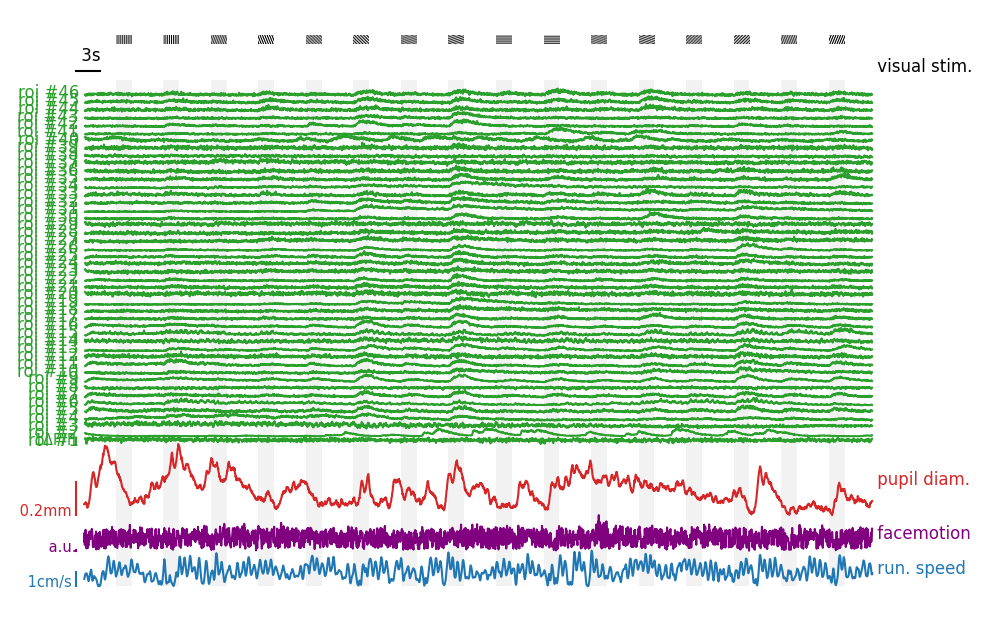

In [5]:
dFoF_parameters = dict(\
        roi_to_neuropil_fluo_inclusion_factor=1.15,
        neuropil_correction_factor = 0.7,
        method_for_F0 = 'sliding_percentile',
        percentile=5., # percent
        sliding_window = 5*60, # seconds
)

def show_data(data):
    fig, ax = pt.figure(figsize=(2.5,6))
    
    data.init_visual_stim()
    tlim = [0, 100]
    data.build_dFoF(**dFoF_parameters)
    np.random.seed(3)
    settings = {'Locomotion': {'fig_fraction': 1, 'subsampling': 1, 'color': '#1f77b4'},
                'FaceMotion': {'fig_fraction': 1, 'subsampling': 1, 'color': 'purple'},
                'Pupil': {'fig_fraction': 2, 'subsampling': 1, 'color': '#d62728'},
                 'CaImaging': {'fig_fraction': 10,
                  'subsampling': 1,
                  'subquantity': 'dF/F',
                  #'roiIndices': np.random.choice(np.arange(data.nROIs), np.min([20,data.nROIs]), replace=False),
                  'roiIndices': np.arange(data.nROIs),
                  'color': '#2ca02c'},
                 'VisualStim': {'fig_fraction': 0.5, 'color': 'black', 'with_screen_inset':True}}
    
    return plot_raw(data, tlim=tlim, settings=settings, ax=ax)
    
data = Data(DATASET['WT']['files'][3],
            with_visual_stim=True)
show_data(data)
data = Data(DATASET['KO']['files'][1],
            with_visual_stim=True)
show_data(data)

NWB-file reading time: 70.3ms

calculating dF/F with method "percentile" [...]

  ** 1 ROIs were discarded with the positive F0 criterion (2.8%) ** 

-> dFoF calculus done !  (calculation took 0.0s)
NWB-file reading time: 69.9ms

calculating dF/F with method "percentile" [...]

  ** 26 ROIs were discarded with the positive F0 criterion (37.1%) ** 

-> dFoF calculus done !  (calculation took 0.1s)


(None, <Axes: >)

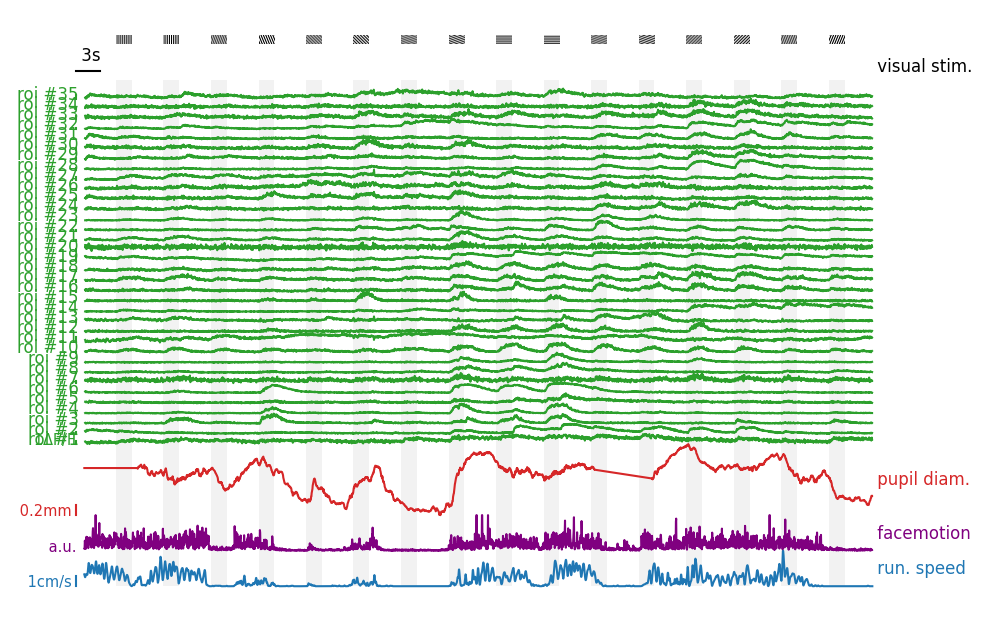

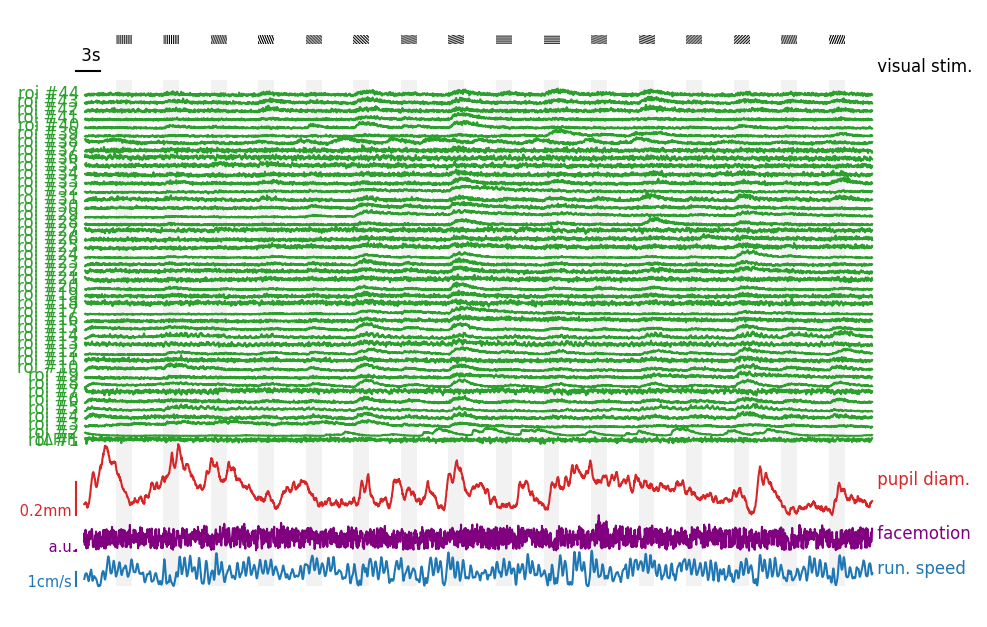

In [6]:
tlim = [0, 100]
#tlim = [400,700]

def show_data(data):
    fig, ax = pt.figure(figsize=(2.5,6))
    
    data.init_visual_stim()
    data.build_dFoF()
    np.random.seed(3)
    settings = {'Locomotion': {'fig_fraction': 1, 'subsampling': 1, 'color': '#1f77b4'},
                'FaceMotion': {'fig_fraction': 1, 'subsampling': 1, 'color': 'purple'},
                'Pupil': {'fig_fraction': 2, 'subsampling': 1, 'color': '#d62728'},
                 'CaImaging': {'fig_fraction': 10,
                  'subsampling': 1,
                  'subquantity': 'dF/F',
                  #'roiIndices': np.random.choice(np.arange(data.nROIs), np.min([20,data.nROIs]), replace=False),
                  'roiIndices': np.arange(data.nROIs),
                  'color': '#2ca02c'},
                 'VisualStim': {'fig_fraction': 0.5, 'color': 'black', 'with_screen_inset':True}}
    
    return plot_raw(data, tlim=tlim, settings=settings, ax=ax)

data = Data(DATASET['WT']['files'][3],
            with_visual_stim=True)
show_data(data)
data = Data(DATASET['KO']['files'][1],
            with_visual_stim=True)
show_data(data)

NWB-file reading time: 70.0ms

calculating dF/F with method "percentile" [...]

  ** 1 ROIs were discarded with the positive F0 criterion (2.8%) ** 

-> dFoF calculus done !  (calculation took 0.0s)
NWB-file reading time: 70.9ms

calculating dF/F with method "percentile" [...]

  ** 26 ROIs were discarded with the positive F0 criterion (37.1%) ** 

-> dFoF calculus done !  (calculation took 0.1s)


(None, <Axes: >)

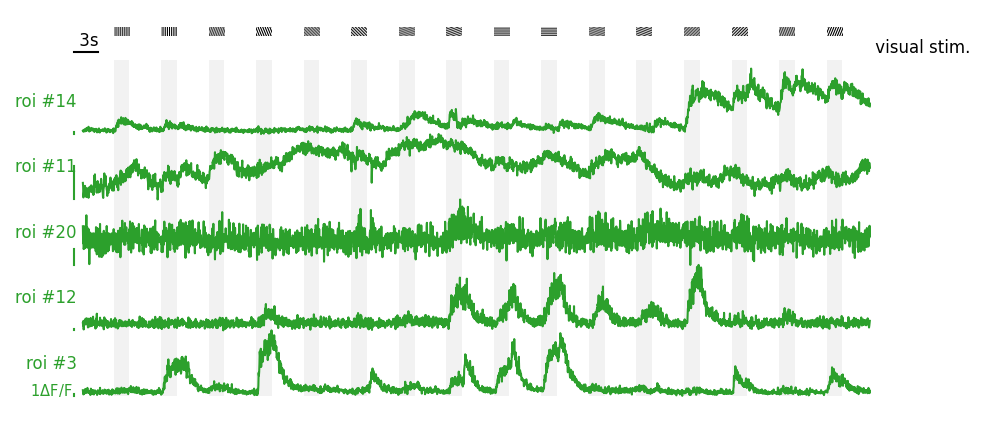

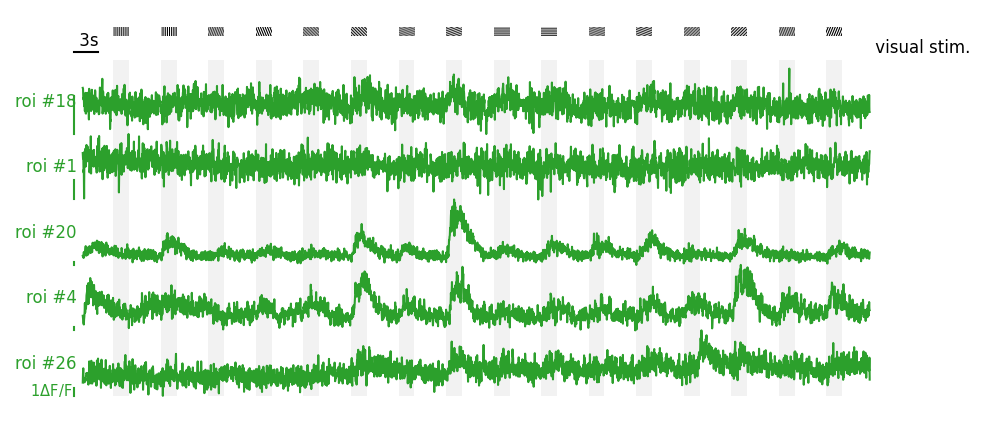

In [7]:
data = Data(DATASET['WT']['files'][3],
            with_visual_stim=True)
data.init_visual_stim()
data.build_dFoF()
fig, ax = pt.figure(figsize=(2.5,4))
settings = {'CaImaging': {'fig_fraction': 10,
              'subsampling': 1,
              'subquantity': 'dF/F',
              'roiIndices': [2,11,19,10,13],
              'color': '#2ca02c'},
             'VisualStim': {'fig_fraction': 0.5, 'color': 'black', 'with_screen_inset':True}}
plot_raw(data, tlim=tlim, settings=settings, ax=ax)

data = Data(DATASET['KO']['files'][1],
            with_visual_stim=True)
data.init_visual_stim()
data.build_dFoF()
fig, ax = pt.figure(figsize=(2.5,4))
settings = {'CaImaging': {'fig_fraction': 10,
              'subsampling': 1,
              'subquantity': 'dF/F',
              'roiIndices': [25, 3, 19, 0, 17],
              'color': '#2ca02c'},
             'VisualStim': {'fig_fraction': 0.5, 'color': 'black', 'with_screen_inset':True}}
plot_raw(data, tlim=tlim, settings=settings, ax=ax)

In [8]:
def build_contrast_trace(data):
    contrast = 0*data.t_dFoF
    for tstart, tstop, c in zip(data.visual_stim.experiment['time_start'],
                                data.visual_stim.experiment['time_stop'],
                                data.visual_stim.experiment['contrast']):
        cond = (data.t_dFoF>tstart) & (data.t_dFoF<tstop)
        contrast[cond] = c
    return contrast

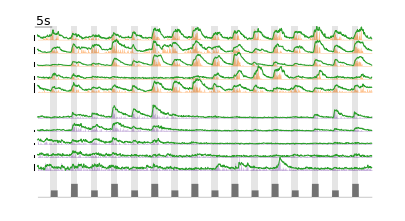

In [10]:
tlim = [0, 100]

# filtering
from scipy.ndimage import gaussian_filter1d
smoothing = 1.5 # for display
# deconvolution
Tau = 1.5

from physion.imaging.dcnv import oasis

fig, ax = pt.figure(figsize=(1.7,2))

example = {'WT_session':9,
           'WT_indices':[2,11,19,10,13],
           'WT_extents':[1, 1, 1, 1, 1],
           'WT_scale':3,
           'KO_session':13,
           'KO_indices':[25, 3, 19, 0, 17],
           'KO_extents':[1, 2, 2, 1.5, 1],
           'KO_scale':6}


for key, color, i0 in zip(['WT','KO'], ['tab:orange', 'tab:purple'],
                          [len(example['KO_indices'])+1, 0]):
                            
    data = Data(DATASET[key]['files'][example['%s_session' % key]],
                with_visual_stim=True, verbose=False)
    data.init_visual_stim()
    data.build_dFoF(verbose=False)
    contrast = build_contrast_trace(data)
    Dcnv = oasis(data.dFoF, data.dFoF.shape[0], Tau, 1./data.CaImaging_dt)
    cond = (data.t_dFoF>tlim[0]) & (data.t_dFoF<tlim[1])
    for i, roi in enumerate(example['%s_indices' % key]):
        extent = example['%s_extents' % key][i]
        # deconvolved first
        trace = Dcnv[roi,cond]
        trace = gaussian_filter1d(trace, smoothing)
        trace = trace/np.max(trace)
        trace /= extent
        ax.fill_between(data.t_dFoF[cond], i+i0+0*trace, i+i0+trace, lw=0.1, alpha=.5, color=color)
        # then dFoF
        trace = data.dFoF[roi,cond]
        trace = gaussian_filter1d(trace, smoothing)
        amplitude = (np.max(trace)-np.min(trace))
        trace = (trace-np.min(trace))/amplitude
        trace /= extent
        ax.plot((tlim[0]-1)*np.ones(2), i+i0+np.arange(2)*(example['%s_scale' % key]/amplitude/extent), 'k-', lw=0.5)
        ax.plot(data.t_dFoF[cond], i+i0+trace, color='tab:green', lw=0.5)
        
ax.fill_between(data.t_dFoF[cond], 0*contrast[cond]-2, -2+contrast[cond], color='tab:grey', lw=0.1)

tstarts = data.visual_stim.experiment['time_start'][(data.visual_stim.experiment['time_start']>tlim[0]) & \
                                                        (data.visual_stim.experiment['time_start']<tlim[1])]
duration = data.visual_stim.experiment['time_duration'][0]
for tstart in tstarts:
    ax.fill_between([tstart, tstart+duration], [-2,-2], 
                    [len(example['KO_indices'])+len(example['WT_indices'])+1], 
                     color='k', alpha=0.1, lw=0)

pt.draw_bar_scales(ax, Xbar=5, Xbar_label='5s', Ybar=1e-12, fontsize=6, lw=0.2)
pt.set_plot(ax, [])
fig.savefig('../figures/Figure5/raw-dFoF-examples.pdf')

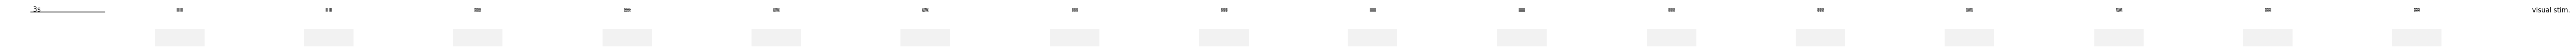

In [11]:
fig, ax = pt.figure(figsize=(7,1))
settings = {'VisualStim': {'fig_fraction': 0.5, 'color': 'black', 'with_screen_inset':True}}
plot_raw(data, tlim=tlim, settings=settings, ax=ax)
fig.savefig('../figures/Figure5/raw-visualStim-examples.pdf')

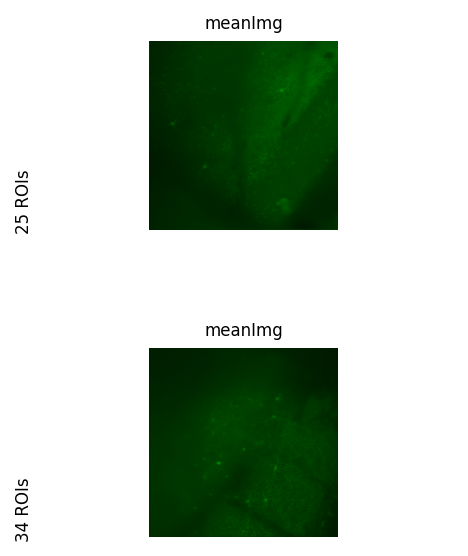

In [12]:
from physion.dataviz.imaging import show_CaImaging_FOV

fig, AX = pt.figure(axes=(1,2), figsize=(1.8,2), top=0)

example = {'WT_session':9,
           'KO_session':13}

for i, key in enumerate(['WT','KO']):
    data = Data(DATASET[key]['files'][example['%s_session' % key]],
                with_visual_stim=True, verbose=False)
    show_CaImaging_FOV(data, key='meanImg', NL=6, ax=AX[i], cmap=pt.get_linear_colormap('k', 'g'))
fig.savefig('../figures/Figure5/raw-FOV-examples.pdf')

(<Figure size 255x195 with 1 Axes>,
 <Axes: title={'center': 'max_proj'}>,
 <matplotlib.image.AxesImage at 0x34f316990>)

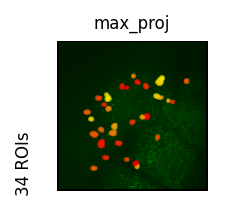

In [13]:
from physion.dataviz.imaging import show_CaImaging_FOV
show_CaImaging_FOV(data, key='max_proj', NL=3, roiIndices='all')